In [2]:
import numpy as np

In [16]:
class Organism:

    # change these required
    P_ACQUIRE_MUTATION = 0.05
    P_LOSE_MUTATION = 0.0

    def __init__(self, gene: bool = False):
        self.gene = gene

    def replicate_gene(self):

        # acquire mutation
        if (not self.gene) and (np.random.rand() < self.P_ACQUIRE_MUTATION):
            copied_gene = True
        # lose mutation (an extension; usually don't happen)
        elif self.gene and (np.random.rand() < self.P_LOSE_MUTATION):
            copied_gene = False
        # standard copy
        else:
            copied_gene = self.gene

        return copied_gene

    def divide(self):
        # Perform binary fission by replicating the genes and dividing into two organisms
        offsprings = [
            Organism(gene=self.replicate_gene()),
            Organism(gene=self.replicate_gene()),
        ]
        return offsprings

In [31]:
class Experiment:

    # change if required
    N_GENERATIONS = 12

    def __init__(self):
        self.population = []
        self.population_genome = []
        self.mutation_part = []

    def run_generations(self):

        # initialize
        self.population = [[Organism()]]
        self.population_genome.append([x.gene for x in self.population[-1]])
        self.mutation_part.append(np.mean(self.population_genome[-1]))

        for i in range(self.N_GENERATIONS - 1):
            current_generation = self.population[-1]
            new_generation = [offspring for x in current_generation for offspring in x.divide()]
            self.population.append(new_generation)
            self.population_genome.append([x.gene for x in new_generation])
            self.mutation_part.append(np.mean(self.population_genome[-1]))

    def print_population(self):
        for i in range(self.N_GENERATIONS):
            print(f"generation #{i}: {self.mutation_part[i]}")

In [32]:
experiment = Experiment()

experiment.run_generations()

experiment.print_population()

generation #0: 0.0
generation #1: 0.0
generation #2: 0.0
generation #3: 0.0
generation #4: 0.0625
generation #5: 0.1875
generation #6: 0.21875
generation #7: 0.265625
generation #8: 0.296875
generation #9: 0.318359375
generation #10: 0.359375
generation #11: 0.38671875


In [33]:
def run_experiment_series(n_experiments: int):

    n_generations = Experiment.N_GENERATIONS
    mutation_part_array = np.zeros((n_experiments, n_generations))

    for n in range(n_experiments):
        if n % 10 == 0:
            print(f"experiment #{n}")
        experiment = Experiment()
        experiment.run_generations()
        mutation_part_array[n, :] = np.array(experiment.mutation_part)

    return mutation_part_array

run_experiment_series(n_experiments=10)

experiment #0


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03125   , 0.046875  , 0.109375  , 0.16015625, 0.20898438,
        0.26074219, 0.29248047],
       [0.        , 0.        , 0.        , 0.        , 0.125     ,
        0.1875    , 0.21875   , 0.2734375 , 0.3203125 , 0.35742188,
        0.38867188, 0.41845703],
       [0.        , 0.        , 0.        , 0.        , 0.0625    ,
        0.0625    , 0.109375  , 0.1484375 , 0.18359375, 0.22265625,
        0.26269531, 0.29541016],
       [0.        , 0.        , 0.        , 0.        , 0.0625    ,
        0.1875    , 0.203125  , 0.21875   , 0.25390625, 0.27929688,
        0.30761719, 0.34375   ],
       [0.        , 0.        , 0.25      , 0.25      , 0.25      ,
        0.28125   , 0.296875  , 0.359375  , 0.38671875, 0.41601562,
        0.44140625, 0.46826172],
       [0.        , 0.        , 0.25      , 0.25      , 0.25      ,
        0.28125   , 0.296875  , 0.328125  , 0.35546875, 0.38671875,
        0.41894531,

In [38]:
from tqdm import tqdm
import numpy as np

def run_experiment_series(n_experiments: int):
    n_generations = Experiment.N_GENERATIONS
    mutation_part_array = np.zeros((n_experiments, n_generations))

    for n in tqdm(range(n_experiments), desc="Running Experiments"):
        experiment = Experiment()
        experiment.run_generations()
        mutation_part_array[n, :] = np.array(experiment.mutation_part)

    return mutation_part_array

run_experiment_series(n_experiments=500)

Running Experiments: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 176.44it/s]


array([[0.        , 0.        , 0.25      , ..., 0.51953125, 0.54785156,
        0.56884766],
       [0.        , 0.        , 0.        , ..., 0.34375   , 0.37988281,
        0.40429688],
       [0.        , 0.        , 0.        , ..., 0.375     , 0.40917969,
        0.43310547],
       ...,
       [0.        , 0.        , 0.        , ..., 0.36328125, 0.39746094,
        0.43164062],
       [0.        , 0.        , 0.25      , ..., 0.46484375, 0.48730469,
        0.51416016],
       [0.        , 0.        , 0.25      , ..., 0.52929688, 0.55371094,
        0.57568359]])

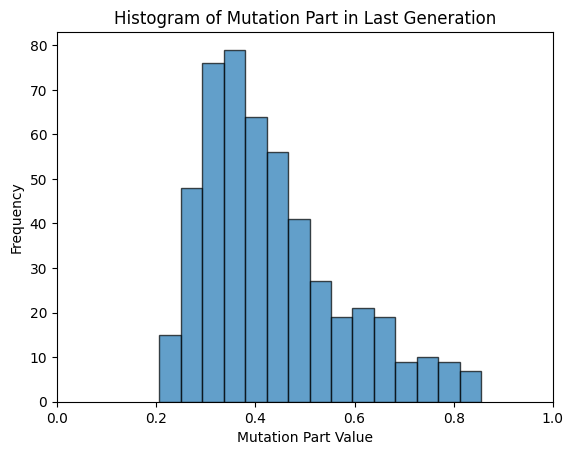

In [37]:
# Plot the histogram
plt.hist(mutation_part_last_generation, bins=15, edgecolor='black', alpha=0.7)
plt.xlabel("Mutation Part Value")
plt.ylabel("Frequency")
plt.title("Histogram of Mutation Part in Last Generation")
plt.xlim([0, 1])
plt.show()